In [1]:
import numpy as np
import pandas as pd

In [2]:
datos = pd.read_csv('C:/Users/VivoBook/Documents/Roberto/_Data_Science_curso/221018 Tp/properatti.csv', index_col=0)

In [3]:
datos.shape

(121220, 25)

In [4]:
datos.isna().sum()

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [5]:
# Chequeo de que los precios sean consistentes
# Veo muy consistentes los precios price_aprox_usd y price_usd_per_m2 y también surface_total_in_m2
datos[['price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2', 'currency', 'surface_total_in_m2']].to_csv('precios.csv')


In [6]:
# Chequeo de que existan estas Fotos - Existen pero no sé si vale la pena conservarlo
datos[['image_thumbnail']].to_csv('imagenes.csv')


In [7]:
# Chequeo único valor de este campo
datos.country_name.value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [8]:
# Función CuentaPalabras que hace dos cosas
    # toma un texto y le quita los caracteres especiales que vi que más se repetían
    # suma a dos listas la palabra y la cantidad de veces que aparece en el texto

import collections

def CuentaPalabras(texto):
    specialChars = ',()./-:'
    for specialChars in specialChars:
        texto = texto.replace(specialChars,'')
        
    counter = collections.Counter(texto.split(' '))
    for palabra, cont in counter.most_common():
        listPalabras.append(palabra)
        listCantidad.append(cont)


In [9]:
# recorre el campo description y llama la funcion CuentaPalabras en cada registro y va sumando palabra y cantidad de cada registro
# Genera un DataFrame CantPalabras con las dos listas

listPalabras = []
listCantidad = []
datos.description.apply(lambda x: CuentaPalabras(str(x).lower()))
CantPalabras = pd.DataFrame({'palabra': listPalabras, 'cantidad': listCantidad})

In [10]:
# Agrupa el DataFrame por palabra sumando cantidad

CantPalabrasAgrupadas = CantPalabras.groupby(['palabra']).aggregate({'cantidad': 'sum'}).sort_values(['cantidad'], ascending=False)

In [11]:
# Exporté a un csv, trabajé en Excel y elegí 52 palabras que aún queda por agrupar que usando regex pueden servir como:
    # complemento a alguna columna que tenga vacíos 
    # generar nueva columna de variable que sirvan para el análisis

CantPalabrasAgrupadas.to_csv('Palabras agrupadas.csv')

In [12]:
import re

In [13]:
SerieAmbiente = datos['description']
patron_amb = '\d\s+[Aa]mbiente'
patron_regex_amb = re.compile(patron_amb)
Ambiente = SerieAmbiente.apply(lambda x: np.NaN if len(patron_regex_amb.findall(str(x)))==0
                               else (patron_regex_amb.findall(str(x))[0])[0])
datos['ambientes'] = Ambiente

In [14]:
SerieBanio = datos['description']
patron_banio = '\d\s+[Bb]año'
patron_regex_banio = re.compile(patron_banio)
Banio = SerieBanio.apply(lambda x: np.NaN if len(patron_regex_banio.findall(str(x)))==0
                               else (patron_regex_banio.findall(str(x))[0])[0])
datos['baños'] = Banio

In [15]:
SerieDormi = datos['description']
patron_dormi = '(\d\s+[Dd]ormitorio|\d\s+[Hh]abitac)'
patron_regex_dormi = re.compile(patron_dormi)
Dormitorio = SerieDormi.apply(lambda x: np.NaN if len(patron_regex_dormi.findall(str(x)))==0
                               else (patron_regex_dormi.findall(str(x))[0])[0])
datos['dormitorios'] = Dormitorio

In [16]:
SerieBalc = datos['description']
patron_balc = '[Bb]alc[oó]n'
patron_regex_balc = re.compile(patron_balc)
Balcon = SerieBalc.apply(lambda x: False if len(patron_regex_balc.findall(str(x)))==0 else True)
datos['balcon'] = Balcon

In [17]:
SerieCoch = datos['description']
patron_coch = '([Cc]ochera|[Gg]arage)'
patron_regex_coch = re.compile(patron_coch)
Cochera = SerieCoch.apply(lambda x: False if len(patron_regex_coch.findall(str(x)))==0 else True)
datos['cochera'] = Cochera

In [18]:
SerieJardin = datos['description']
patron_jardin = '[Jj]ard[ií]n'
patron_regex_jardin = re.compile(patron_jardin)
Jardin = SerieJardin.apply(lambda x: False if len(patron_regex_jardin.findall(str(x)))==0 else True)
datos['jardin'] = Jardin

In [19]:
SerieLavadero = datos['description']
patron_lavadero = '[Ll]avadero'
patron_regex_lavadero = re.compile(patron_lavadero)
Lavadero = SerieLavadero.apply(lambda x: False if len(patron_regex_lavadero.findall(str(x)))==0 else True)
datos['lavadero'] = Lavadero

In [20]:
SerieParrilla = datos['description']
patron_parrilla = '[Pp]arrilla'
patron_regex_parrilla = re.compile(patron_parrilla)
Parrilla = SerieParrilla.apply(lambda x: False if len(patron_regex_parrilla.findall(str(x)))==0 else True)
datos['parrilla'] = Parrilla

In [21]:
SeriePatio = datos['description']
patron_patio = '[Pp]atio'
patron_regex_patio = re.compile(patron_patio)
Patio = SeriePatio.apply(lambda x: False if len(patron_regex_patio.findall(str(x)))==0 else True)
datos['patio'] = Patio

In [22]:
SeriePileta = datos['description']
patron_pileta = '([Pp]ileta|[Pp]iscina)'
patron_regex_pileta = re.compile(patron_pileta)
Pileta = SeriePileta.apply(lambda x: False if len(patron_regex_pileta.findall(str(x)))==0 else True)
datos['pileta'] = Pileta

In [23]:
SerieExcelente = datos['description']
patron_excelente = '[Ee]xcelentes*\s\w+'
patron_regex_excelente = re.compile(patron_excelente)
lista_excelente = ['excelente departamento', 'excelente estado', 'excelente calidad', 'excelente casa', 'excelente propiedad',
                    'excelente vista', 'excelentes vistas', 'excelentes terminaciones', 'excelente chalet', 'excelentes detalles',
                    'excelente monoambiente', 'excelente ph', 'excelente duplex', 'excelente edificio', 'excelente piso',
                    'excelente local', 'excelente unidad', 'excelente semipiso', 'excelente depto', 'excelentes departamentos',
                    'excelente categoría', 'excelente dpto', 'excelente nivel', 'excelente dúplex', 'excelente terminación',
                    'excelentes unidades', 'excelente semi', 'excelente detalle', 'excelente terminaciones', 'excelentes calidades']
Excelente = SerieExcelente.apply(lambda x: False if (len(patron_regex_excelente.findall(str(x)))==0 or
                                                      patron_regex_excelente.findall(str(x).lower())[0] not in lista_excelente)
                                                      else True)
datos['excelente'] = Excelente

In [24]:
SerieVista = datos['description']
patron_vista = '([Aa]l\s[Ff]rente|[\s.,!/][Vv]istas*[\s.,!/)])'
patron_regex_vista = re.compile(patron_vista)
Vista = SerieVista.apply(lambda x: False if len(patron_regex_vista.findall(str(x)))==0 else True)
datos['vista'] = Vista

In [25]:
# cuando price_usd_m2 es nulo, o bien price_aprox_usd es nulo o surface_total_in_m2 es nulo
# por lo tanto no podemos conformarlo a partir de esos dos valores
datos_usdm2_null = datos[datos['price_usd_per_m2'].isnull()]


In [26]:
# Cuando price_usd_per_m2 es nulo hay muchos registros completos en price_per_m2
# Tomamos sólo los que se encuentran entre 1000 y 6000 que hacen pensar que se cargaron en el campo equivocado
# Son 17.817 valores que llevarían los 52.603 nulos de price_usd_per_m2 a 34.786

mask1 = datos_usdm2_null['price_per_m2'] < 6000
mask2 = datos_usdm2_null['price_per_m2'] > 500
Serie_price_per_m2 = datos_usdm2_null[mask1 & mask2]['price_per_m2']
datos['usd_per_m2_2'] = Serie_price_per_m2

In [27]:
# Esto es lo que hizo Rodrigo aplicado acá
ubicacion = datos["place_with_parent_names"].str.split('|', expand=True) # Separo en varias columnas
pais = ubicacion.iloc[:,1]
ciudad = ubicacion.iloc[:,2]
barrio = ubicacion.iloc[:,3]

datos['provincia_ciudad'] = ciudad
datos['ciudad_barrio'] = barrio

In [28]:
# veo las combinaciones de mayor cantidad del campo nuevo para poder comparar los valores
datos.groupby(['provincia_ciudad', 'ciudad_barrio', 'property_type']).\
        aggregate({'price_usd_per_m2': 'count', 'usd_per_m2_2': 'count'}).to_csv('groupby.csv')

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Count'>

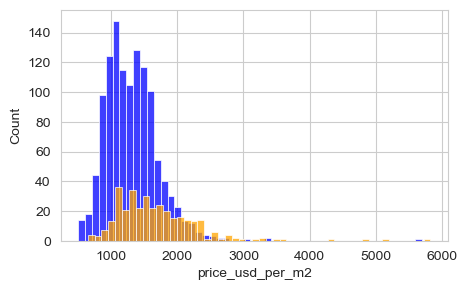

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# mask3=datos['provincia_ciudad']=='Buenos Aires Costa Atlántica'; mask4=datos['ciudad_barrio']=='Mar del Plata'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Tigre'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Tigre'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask4=datos['ciudad_barrio']=='Lomas de Zamora'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Vicente López'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Oeste'; mask4=datos['ciudad_barrio']=='La Matanza'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Capital Federal'; mask4=datos['ciudad_barrio']=='Palermo'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='San Isidro'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask4=datos['ciudad_barrio']=='La Plata'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask4=datos['ciudad_barrio']=='Lomas de Zamora'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask4=datos['ciudad_barrio']=='La Plata'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Oeste'; mask4=datos['ciudad_barrio']=='Morón'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Escobar'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Vicente López'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask4=datos['ciudad_barrio']=='Pilar'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Capital Federal'; mask4=datos['ciudad_barrio']=='Belgrano'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Córdoba'; mask4=datos['ciudad_barrio']=='Córdoba'; mask5=datos['property_type']=='house'
mask3=datos['provincia_ciudad']=='Córdoba'; mask4=datos['ciudad_barrio']=='Córdoba'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Capital Federal'; mask4=datos['ciudad_barrio']=='Caballito'; mask5=datos['property_type']=='apartment'
# mask3=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask4=datos['ciudad_barrio']=='Almirante Brown'; mask5=datos['property_type']=='house'
# mask3=datos['provincia_ciudad']=='Santa Fe'; mask4=datos['ciudad_barrio']=='Rosario'; mask5=datos['property_type']=='apartment'

mask6 = datos['price_usd_per_m2'] < 6000
mask7 = datos['price_usd_per_m2'] > 500

datos_grafico1 = datos[mask3 & mask4 & mask5 & mask6 & mask7]
datos_grafico2 = datos[mask3 & mask4 & mask5]
sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
sns.histplot(data=datos_grafico1['price_usd_per_m2'], color='blue', bins=50)
sns.histplot(data=datos_grafico2['usd_per_m2_2'], color= 'orange', bins=50)


In [30]:
datos['usd_m2_final'] = datos.apply(lambda x: x['price_usd_per_m2'] if x['price_usd_per_m2'] > 1 else x['usd_per_m2_2'], axis=1)
datos['usd_m2_final'].isnull().sum()

32639

In [31]:
datos.groupby(['provincia_ciudad', 'ciudad_barrio', 'property_type']).aggregate({'usd_m2_final': 'count'}).to_csv('groupby.csv')

<AxesSubplot:xlabel='excelente', ylabel='usd_m2_final'>

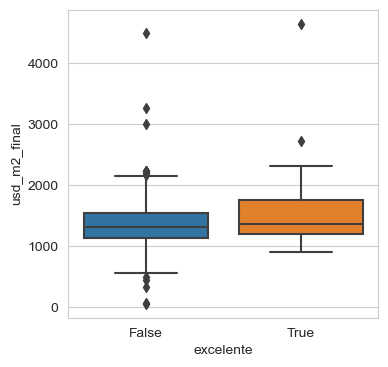

In [32]:
# mask10=datos['provincia_ciudad']=='Buenos Aires Costa Atlántica'; mask11=datos['ciudad_barrio']=='Mar del Plata'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Tigre'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Santa Fe'; mask11=datos['ciudad_barrio']=='Rosario'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='Palermo'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='Belgrano'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Vicente López'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='Caballito'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Córdoba'; mask11=datos['ciudad_barrio']=='Córdoba'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='Recoleta'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask11=datos['ciudad_barrio']=='Lomas de Zamora'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='Villa Urquiza'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='San Isidro'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Oeste'; mask11=datos['ciudad_barrio']=='Morón'; mask12=datos['property_type']=='apartment'
# mask10=datos['provincia_ciudad']=='Capital Federal'; mask11=datos['ciudad_barrio']=='San Telmo'; mask12=datos['property_type']=='apartment'

# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Tigre'; mask12=datos['property_type']=='house'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Escobar'; mask12=datos['property_type']=='house'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='San Isidro'; mask12=datos['property_type']=='house'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Sur'; mask11=datos['ciudad_barrio']=='Lomas de Zamora'; mask12=datos['property_type']=='house'
# mask10=datos['provincia_ciudad']=='Buenos Aires Costa Atlántica'; mask11=datos['ciudad_barrio']=='Mar del Plata'; mask12=datos['property_type']=='house'
# mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Vicente López'; mask12=datos['property_type']=='house'
mask10=datos['provincia_ciudad']=='Bs.As. G.B.A. Zona Norte'; mask11=datos['ciudad_barrio']=='Pilar'; mask12=datos['property_type']=='house'

mask13=datos['surface_total_in_m2'] < 200
mask14=datos['usd_m2_final'] < 6000
datos_scatter = datos[mask10 & mask11 & mask12 & mask13 & mask14]

sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.boxplot(data=datos_scatter, x='excelente', y='usd_m2_final')